In [69]:
'''
Resolvendo um problema de Classificacao
'''

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
# Carregue uma base de dados de regressão que NÃO esteja nos 
# toy datasets do scikit-learn;
# https://www.kaggle.com/ronitf/heart-disease-uci
base = pd.read_csv('heart.csv')
base.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# Treine um modelo da classe LinearRegression 
# do scikit-learn com toda a base;

X, y = base.drop('target',axis=1), base.target
modelo_todo = LogisticRegression()
modelo_todo.fit(X, y)
ypred_todo = modelo_todo.predict(X)
print(f'Erro Quadrado Médio:{mean_squared_error(y, ypred_todo):.2f}')
for col in X.columns:
    X_col = np.array(X[col]).reshape(-1,1)
    modelo.fit(X_col, y)
    ypred = modelo.predict(X_col)
    print(f'Erro Quadrado Medio para {col}: {mean_squared_error(y, ypred):.2f}')



Erro Quadrado Médio:0.15
Erro Quadrado Medio para age: 0.38
Erro Quadrado Medio para sex: 0.39
Erro Quadrado Medio para cp: 0.24
Erro Quadrado Medio para trestbps: 0.42
Erro Quadrado Medio para chol: 0.47
Erro Quadrado Medio para fbs: 0.46
Erro Quadrado Medio para restecg: 0.42
Erro Quadrado Medio para thalach: 0.30
Erro Quadrado Medio para exang: 0.28
Erro Quadrado Medio para oldpeak: 0.31
Erro Quadrado Medio para slope: 0.31
Erro Quadrado Medio para ca: 0.26
Erro Quadrado Medio para thal: 0.25


/Users/viniciusmarques/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
def plot_delta(intercept, erro):
    plt.plot(intercept, erro);
    plt.title('Heart Disease')
    plt.xlabel('Intercept')
    plt.ylabel('Erro Quadrado Médio')
    plt.show;

def intercept_erro(X,y,col, delta):
    X_col = np.array(X[col]).reshape(-1,1)
    modelo = LogisticRegression()
    modelo.fit(X_col, y)
    intercept = np.linspace(modelo.intercept_ - np.random.choice(delta, 1)[0], 
                        modelo.intercept_ + np.random.choice(delta, 1)[0], 
                        50)
    erro = []
    for i in range(len(intercept)):
        ypred1 = intercept[i] + modelo.coef_*X_col
        erro.append(mean_squared_error(y, ypred1))
    return intercept, erro

    

Text(18.0, 0.5, 'Erro')

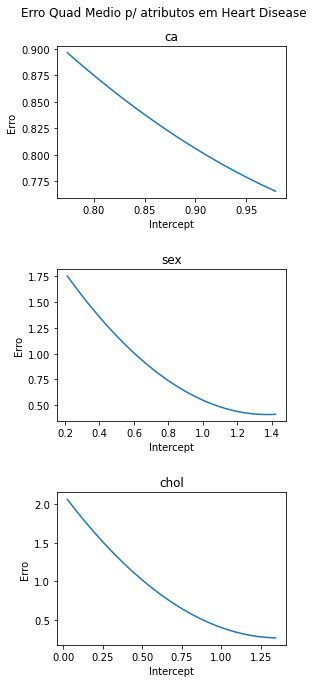

In [102]:
atributos = np.random.choice(X.columns, 3, replace=False)
delta = np.random.random(100)
i0, e0 = intercept_erro(X,y,atributos[0],delta)
i1, e1 = intercept_erro(X,y,atributos[1],delta)
i2, e2 = intercept_erro(X,y,atributos[2],delta)
fig, axs = plt.subplots(3, figsize=(5,10))
fig.suptitle('Erro Quad Medio p/ atributos em Heart Disease')
fig.tight_layout(pad=5.0)
axs[0].plot(i0, e0)
axs[0].set_title(atributos[0])
axs[0].set_xlabel("Intercept")
axs[0].set_ylabel("Erro")
axs[1].plot(i1, e1)
axs[1].set_title(atributos[1])
axs[1].set_xlabel("Intercept")
axs[1].set_ylabel("Erro")
axs[2].plot(i2, e2)
axs[2].set_title(atributos[2])
axs[2].set_xlabel("Intercept")
axs[2].set_ylabel("Erro")


